# Importando as bibliotecas necessárias.

In [106]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import random
from fnmatch import fnmatch
from IPython.display import Audio
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Função para a seleção aleatoria de áudio.

In [2]:
def selecione_audio_aleatorio(root='./data/UrbanSound8K'):
    pattern = '*.wav'
    sounds = []
    for path, subdirs, files in os.walk(root):
        for name in files:
            if fnmatch(name, pattern):
                sounds.append(os.path.join(path, name))
                
    sound = random.choice(sounds)
    # Retorna caminho
    return sound

In [3]:
audio_aleatorio = selecione_audio_aleatorio()
Audio(audio_aleatorio)

In [4]:
Audio1 = selecione_audio_aleatorio()
Audio2 = selecione_audio_aleatorio()

# Função para a impressão do sinal de áudio.
Essa função tem como argumentos o audio e a escala desejada para impressão do sinal.

Além disso, nessa seção são mostradas a taxa de amostragem e a amplitude dos audios.

In [5]:
def sinal_espec(audio, escala):
    '''
    audio: Nome da variável que está armazenando áudio.
    escala: Escala a qual se deseja plotar o espectrograma - STR
    '''
    data, sr = librosa.load(audio)
    fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(12,6))
    librosa.display.waveshow(data, sr=sr, ax=ax[0])
    ax[0].set(title='Sinal da onda sonora')
    ax[0].label_outer()
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    librosa.display.specshow(D, y_axis=escala, x_axis = 'time', sr=sr, ax=ax[1])
    ax[1].set(title=f'Espectrograma em escala {escala}')
    ax[1].set(xlabel='Tempo (segundos)')
    ax[1].label_outer()
    return

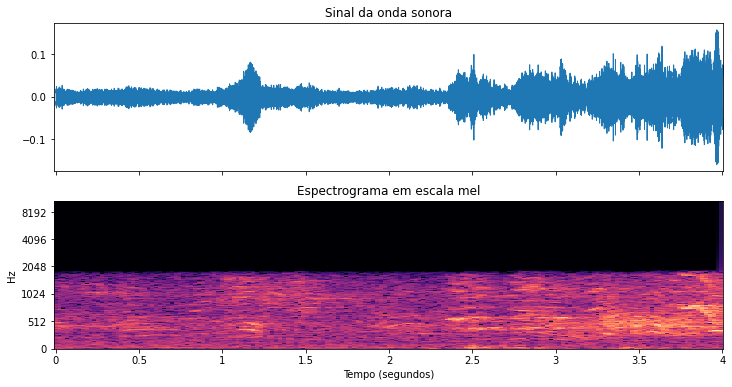

In [6]:
sinal_espec(Audio1, 'mel')
Audio(Audio1)

In [7]:
data, sr = librosa.load(Audio1)
print(f'A amplitude tem o valor de {data.max():.3f} e a taxa de amostragem {sr}')

A amplitude tem o valor de 0.159 e a taxa de amostragem 22050


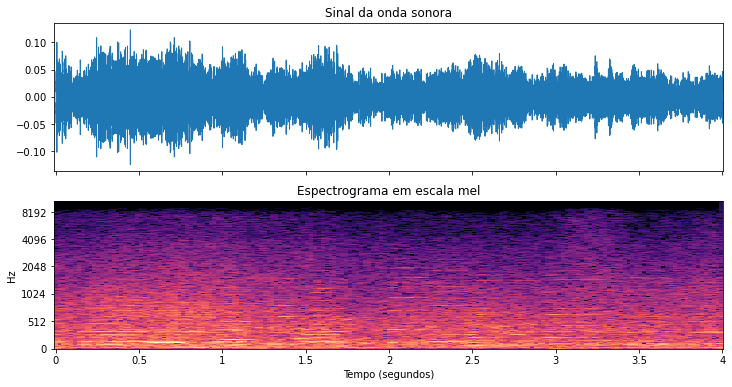

In [8]:
sinal_espec(Audio2, 'mel')
Audio(Audio2)

In [9]:
data, sr = librosa.load(Audio2)
print(f'A amplitude tem o valor de {data.max():.3f} e a taxa de amostragem {sr}')

A amplitude tem o valor de 0.110 e a taxa de amostragem 22050


A partir dos espectrograma é possível notar a densidade das frequências ao longo do tempo. Pode-se observar qais frequências são mais evidentes em cada instante no tempo. As cores mais frias, isto é, azul e roxo presente no espectograma indicam ausência de determinada frequência, enquanto as cores mais quentes indicam a presença da frequência.

### Importando o dataframe dos áudios

In [10]:
sound_df = pd.read_csv('./data/UrbanSound8K/UrbanSound8K.csv')

In [11]:
sound_df.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

#### Frequências absolutas e relativas das classes de áudio.

In [12]:
print('Absoluto')
display(sound_df['class'].value_counts())
print('-'*20)
print('Frequência')
display(sound_df['class'].value_counts(normalize=True) * 100)

Absoluto


dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

--------------------
Frequência


dog_bark            11.452130
children_playing    11.452130
air_conditioner     11.452130
street_music        11.452130
engine_idling       11.452130
jackhammer          11.452130
drilling            11.452130
siren               10.639029
car_horn             4.912964
gun_shot             4.283097
Name: class, dtype: float64

In [19]:
sound_df.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

# Impressão dos gráficos das features

In [20]:
def plot_rms_energy(rms, S, y):     
    times = librosa.times_like(rms)
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(times, rms[0], label='RMS-Energy', color='b')
    ax.legend(loc='upper right')
    ax.label_outer()

In [21]:
y1, sr1 = librosa.load(Audio1);
rms1 = librosa.feature.rms(y=y1);
S1, phase2 = librosa.magphase(librosa.stft(y=y1));
librosa.feature.rms(S=S1);

In [22]:
y2, sr2 = librosa.load(Audio2);
rms2 = librosa.feature.rms(y=y2);
S2, phase2 = librosa.magphase(librosa.stft(y=y2));
librosa.feature.rms(S=S2);

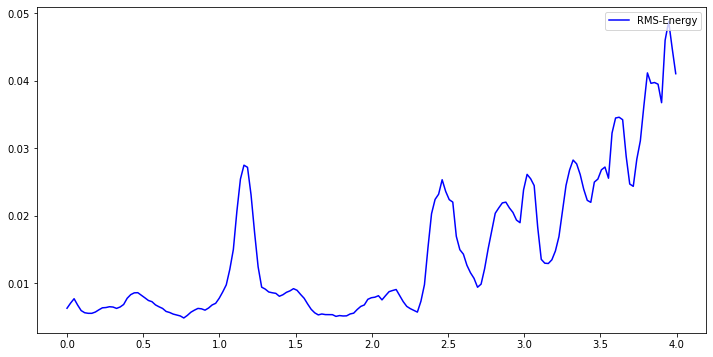

In [23]:
plot_rms_energy(rms1,S1,y1)

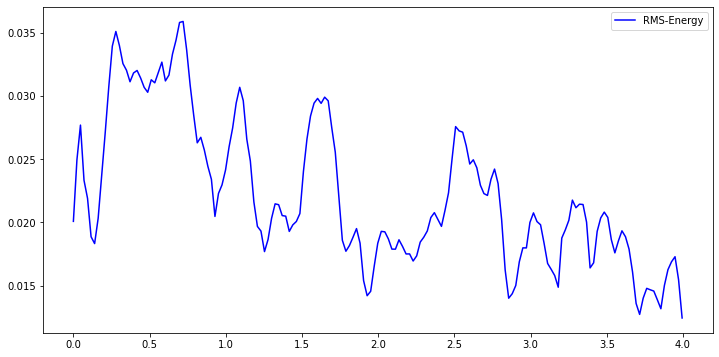

In [24]:
plot_rms_energy(rms2,S2,y2)

# Funções para processar o áudio e extrair de cada um deles as features

In [25]:
def rms(file_path):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    rms = librosa.feature.rms(y=audio);
    # S, phase = librosa.magphase(librosa.stft(y=audio));
    # rms_feat = librosa.feature.rms(S=S);
    rmse_feature_escalonado = np.mean(rms, axis=1)
    return rmse_feature_escalonado

In [26]:
def spec_centr(file_path):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    cent = librosa.feature.spectral_centroid(y=audio, sr=sr);
    # S, phase = librosa.magphase(librosa.stft(y=audio));
    spec_centr_feat_escalonado = np.mean(cent, axis=1)
    return spec_centr_feat_escalonado

In [27]:
def mfcc(file_path, n_mfcc=40):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    mfcc_feature = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    mfcc_feature_escalonado = np.mean(mfcc_feature, axis=1)
    return mfcc_feature_escalonado

In [28]:
def zerocr(file_path):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    zerocr = librosa.feature.zero_crossing_rate(y=audio)
    zerocr_escalonado = np.mean(zerocr, axis=1)
    return zerocr_escalonado

In [29]:
def specrolloff(file_path):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    specrolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
    specrolloff_escalonado = np.mean(specrolloff, axis=1)
    return specrolloff_escalonado

In [30]:
def specflat(file_path):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    specflat = librosa.feature.spectral_flatness(y=audio)
    specflat_escalonado = np.mean(specflat, axis=1)
    return specflat_escalonado

In [31]:
def speccont(file_path):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    speccont = librosa.feature.spectral_contrast(y=audio, sr=sr)
    speccont_escalonado = np.mean(speccont, axis=1)
    return speccont_escalonado

In [32]:
def specbw(file_path):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    specbw = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
    specbw_escalonado = np.mean(specbw, axis=1)
    return specbw_escalonado

USAR MAIS DE UMA FEATURE PARA PODER TENTAR CLASSIFICAR.

TESTAR USANDO rms e spectral centroide JUNTOS

# Extração das features e alocação delas em uma lista.

In [33]:
extracted_features = []
audio_dataset_path = './data/UrbanSound8K'
for index_num, row in (sound_df.iterrows()):
    file_path_list = [
        os.path.abspath(audio_dataset_path),
        'fold'+str(row['fold']) + '/',
        str(row['slice_file_name'])
        ]
    file_path = os.path.join(*file_path_list)
    print(file_path)
    final_class_labels = row['class']
    feature1 = rms(file_path)
    feature2 = spec_centr(file_path)
    feature3 = zerocr(file_path)
    feature4 = specrolloff(file_path)
    # feature5 = specflat(file_path)
    feature5 = speccont(file_path)
    feature6 = specbw(file_path)
    features = mfcc(file_path, n_mfcc=40)
    extracted_features.append([feature1, feature2, feature3, feature4, feature5, feature6, features, final_class_labels])
                              

C:\Users\augus\Downloads\Lets Code\Degree Data Science\Modulo 12 - Dados Não Estruturados I\data\UrbanSound8K\fold5/100032-3-0-0.wav
C:\Users\augus\Downloads\Lets Code\Degree Data Science\Modulo 12 - Dados Não Estruturados I\data\UrbanSound8K\fold5/100263-2-0-117.wav
C:\Users\augus\Downloads\Lets Code\Degree Data Science\Modulo 12 - Dados Não Estruturados I\data\UrbanSound8K\fold5/100263-2-0-121.wav
C:\Users\augus\Downloads\Lets Code\Degree Data Science\Modulo 12 - Dados Não Estruturados I\data\UrbanSound8K\fold5/100263-2-0-126.wav
C:\Users\augus\Downloads\Lets Code\Degree Data Science\Modulo 12 - Dados Não Estruturados I\data\UrbanSound8K\fold5/100263-2-0-137.wav
C:\Users\augus\Downloads\Lets Code\Degree Data Science\Modulo 12 - Dados Não Estruturados I\data\UrbanSound8K\fold5/100263-2-0-143.wav
C:\Users\augus\Downloads\Lets Code\Degree Data Science\Modulo 12 - Dados Não Estruturados I\data\UrbanSound8K\fold5/100263-2-0-161.wav
C:\Users\augus\Downloads\Lets Code\Degree Data Science\Mo

KeyboardInterrupt: 

# Obtenção do DataFrame com as features e as classes dos áudios

In [ ]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['rms','spec_centr','zerocr','specrolloff',
                                                                  'speccont','specbw','mfcc','class'])
extracted_features_df.head()

In [ ]:
# aaaaaa

### Conversão dos valores de cada feature que não são uma lista para valores númericos

In [ ]:
extracted_features_df['rms'] = extracted_features_df['rms'].astype(float)
extracted_features_df['spec_centr'] = extracted_features_df['spec_centr'].astype(float)
extracted_features_df['zerocr'] = extracted_features_df['zerocr'].astype(float)
extracted_features_df['specrolloff'] = extracted_features_df['specrolloff'].astype(float)
# extracted_features_df['speccont'] = extracted_features_df['speccont'].astype(float)
extracted_features_df['specbw'] = extracted_features_df['specbw'].astype(float)

In [ ]:
extracted_features_df['class']

#### Seleção das features númericas

In [ ]:
#Selecionando Spectral Centroide e RMSE
X = extracted_features_df.select_dtypes(include=[np.number])

#### Transformação das features que possuem valores agregados em lista, para posterior concatenação com as demais features para assim obter um DataFrame que englobe todas as features

In [ ]:
#Selecionando MFCC e speccont
mfcc = pd.DataFrame(np.array(extracted_features_df['mfcc'].tolist()))
speccont = pd.DataFrame(np.array(extracted_features_df['speccont'].tolist()))

In [ ]:
result = pd.concat([X, mfcc,speccont,extracted_features_df['class']], axis=1, join='inner')
display(result)

# Transformação do DataFrame resultante em um arquivo csv

In [ ]:
result.to_csv('df_resultante.csv', index=False)

In [34]:
df = pd.read_csv('df_resultante.csv')

In [35]:
df.head()

rms   spec_centr    zerocr  specrolloff       specbw          0  \
0  0.126410  2006.285513  0.124268  2793.164062  1547.242625 -217.35526   
1  0.003993  2076.908755  0.138158  3927.133479  1856.730863 -424.09818   
2  0.003005  1784.415678  0.101531  3624.797349  1823.622936 -458.79114   
3  0.004649  2173.433436  0.128421  4326.929134  2074.007371 -413.89984   
4  0.003215  1949.300041  0.117667  3880.084052  1841.513938 -446.60352   

           1           2          3          4  ...        38        39  \
0   70.22339 -130.385270 -53.282898 -21.199131  ... -0.616984  0.386005   
1  109.34077  -52.919525  60.864750   0.245292  ... -0.544687  0.446321   
2  121.38419  -46.520657  52.008120  -0.000384  ...  1.696297 -0.961410   
3  101.66373  -35.429450  53.036358   1.520217  ... -2.098211 -1.193339   
4  113.68541  -52.402206  60.302044   2.779428  ...  1.116136  0.043718   

         0.1        1.1        2.1        3.1        4.1        5.1  \
0  18.771389  10.467657  20.577827  16.808352  20.245295  20.715360   
1  12.454166  10.771721  14.771810  15.632016  18.379375  22.364662   
2  12.036751  10.639769  14.296682  16.122376  17.240363  21.390776   
3  12.266846  11.326466  17.869792  15.984218  17.385572  23.054206   
4  12.565365  11.158494  14.112202  15.437057  17.405333  21.269560   

         6.1             class  
0  45.387968          dog_bark  
1  49.881406  children_playing  
2  48.158601  children_playing  
3  47.662728  children_playing  
4  47.933097  children_playing  

[5 rows x 53 columns]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 53 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rms          8732 non-null   float64
 1   spec_centr   8732 non-null   float64
 2   zerocr       8732 non-null   float64
 3   specrolloff  8732 non-null   float64
 4   specbw       8732 non-null   float64
 5   0            8732 non-null   float64
 6   1            8732 non-null   float64
 7   2            8732 non-null   float64
 8   3            8732 non-null   float64
 9   4            8732 non-null   float64
 10  5            8732 non-null   float64
 11  6            8732 non-null   float64
 12  7            8732 non-null   float64
 13  8            8732 non-null   float64
 14  9            8732 non-null   float64
 15  10           8732 non-null   float64
 16  11           8732 non-null   float64
 17  12           8732 non-null   float64
 18  13           8732 non-null   float64
 19  14    

In [144]:
X_mfcc = df.iloc[:,5:45]

In [145]:
X_com_mfcc = df.select_dtypes(include=[np.number])

In [146]:
X_sem_mfcc = df[['rms','spec_centr','zerocr','specrolloff','specbw','0.1','1.1','2.1','3.1','4.1','5.1','6.1']]

In [147]:
y = df['class']

In [148]:
# y = np.array(extracted_features_df['class'].tolist())

## Uso do encoder no target e aplicação do modelo

In [149]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [150]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_mfcc, y, test_size=0.2,stratify=y, random_state=42)

In [151]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_com_mfcc, y, test_size=0.2,stratify=y, random_state=42)

In [152]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X_sem_mfcc, y, test_size=0.2,stratify=y, random_state=42)

In [153]:
#MFCC
# Instancia o modelo
model = RandomForestClassifier()
# Fit dos dados de treino
model.fit(X_train1, y_train1)
# Predict com dados de test
y_pred1 = model.predict(X_test1)
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       200
           1       0.99      0.84      0.91        86
           2       0.77      0.84      0.81       200
           3       0.83      0.81      0.82       200
           4       0.87      0.87      0.87       200
           5       0.95      0.96      0.95       200
           6       0.98      0.65      0.78        75
           7       0.91      0.94      0.93       200
           8       0.92      0.94      0.93       186
           9       0.75      0.83      0.79       200

    accuracy                           0.88      1747
   macro avg       0.90      0.86      0.87      1747
weighted avg       0.88      0.88      0.88      1747



In [154]:
#Com MFCC
# Instancia o modelo
model = RandomForestClassifier()
# Fit dos dados de treino
model.fit(X_train2, y_train2)
# Predict com dados de test
y_pred2 = model.predict(X_test2)
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       200
           1       0.97      0.79      0.87        86
           2       0.78      0.85      0.81       200
           3       0.92      0.83      0.87       200
           4       0.88      0.89      0.88       200
           5       0.96      0.98      0.97       200
           6       0.97      0.89      0.93        75
           7       0.93      0.95      0.94       200
           8       0.92      0.95      0.93       186
           9       0.88      0.81      0.84       200

    accuracy                           0.90      1747
   macro avg       0.91      0.89      0.90      1747
weighted avg       0.90      0.90      0.90      1747



In [156]:
#Com MFCC
# Instancia o modelo
model = RandomForestClassifier()
# Fit dos dados de treino
model.fit(X_train3, y_train3)
# Predict com dados de test
y_pred3 = model.predict(X_test3)
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       200
           1       0.88      0.60      0.72        86
           2       0.74      0.80      0.77       200
           3       0.76      0.69      0.72       200
           4       0.84      0.85      0.85       200
           5       0.89      0.96      0.92       200
           6       0.90      0.80      0.85        75
           7       0.85      0.94      0.90       200
           8       0.89      0.91      0.90       186
           9       0.81      0.77      0.79       200

    accuracy                           0.84      1747
   macro avg       0.85      0.82      0.83      1747
weighted avg       0.84      0.84      0.84      1747



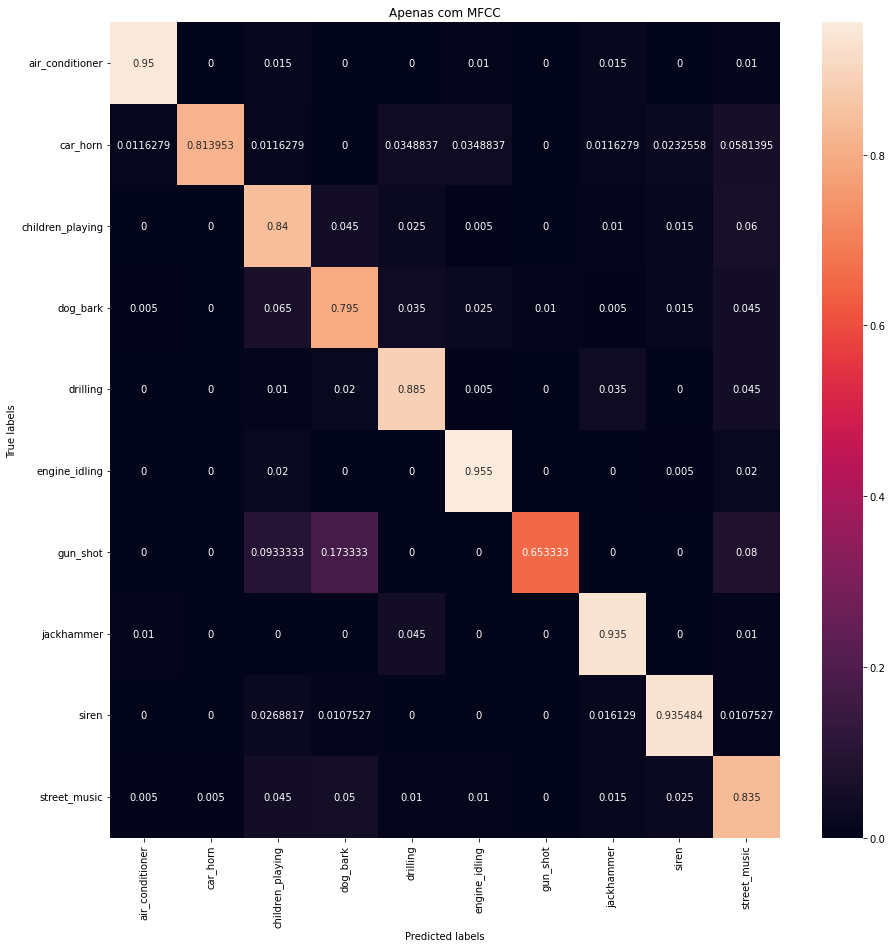

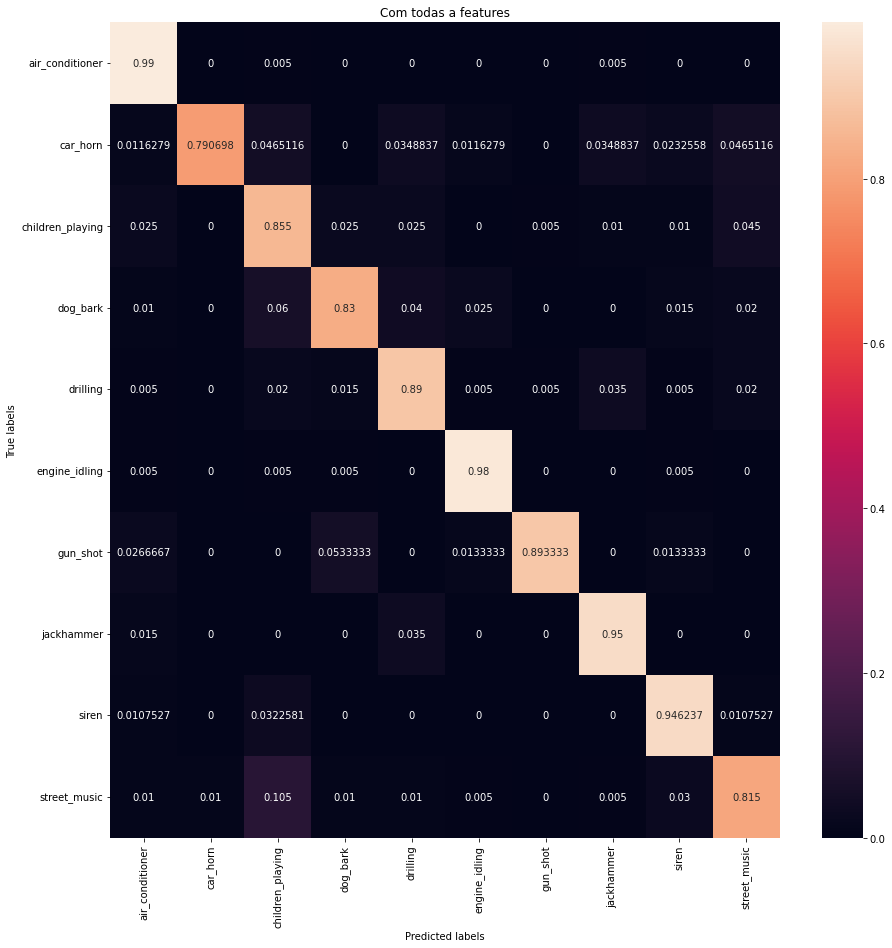

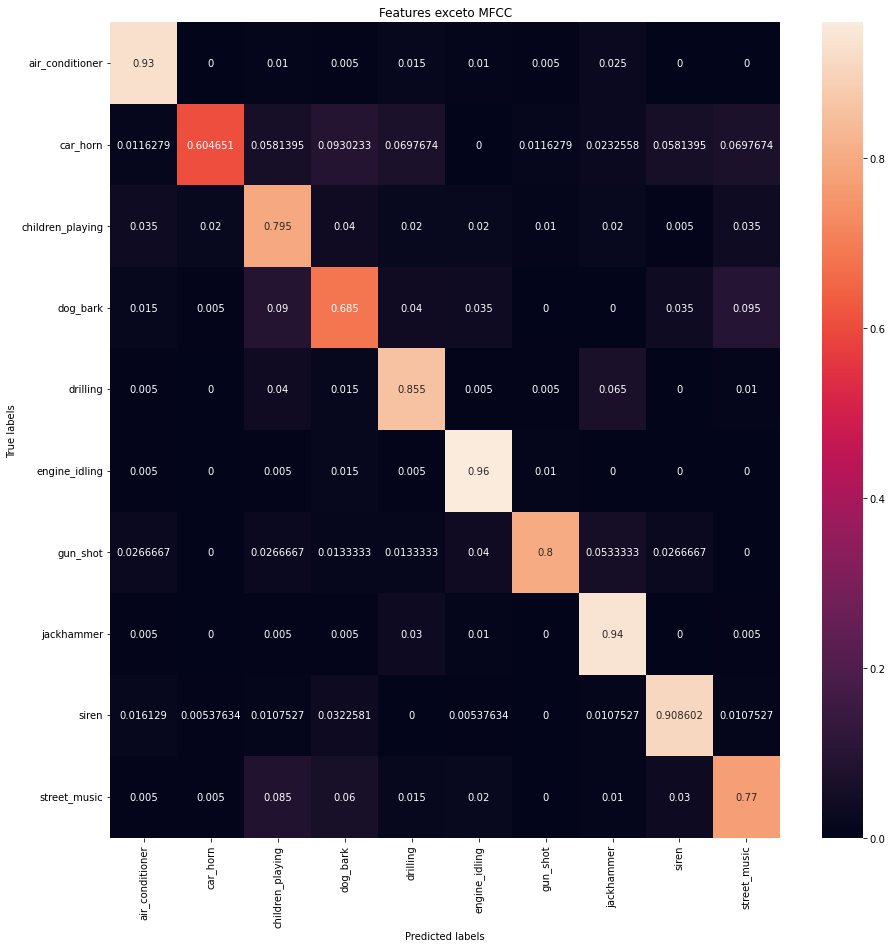

In [157]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
f, ax = plt.subplots(figsize=(15,15))

sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    ax=ax
)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(labelencoder.classes_)
ax.yaxis.set_ticklabels(labelencoder.classes_)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.title('Apenas com MFCC')
plt.show()

cm = confusion_matrix(y_test2, y_pred2, normalize='true')
f, ax = plt.subplots(figsize=(15,15))

sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    ax=ax
)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(labelencoder.classes_)
ax.yaxis.set_ticklabels(labelencoder.classes_)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.title('Com todas a features')
plt.show()

cm = confusion_matrix(y_test3, y_pred3, normalize='true')
f, ax = plt.subplots(figsize=(15,15))

sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    ax=ax
)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(labelencoder.classes_)
ax.yaxis.set_ticklabels(labelencoder.classes_)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.title('Features exceto MFCC')
plt.show()

# Conclusões
- Nota-se que o MFCC é uma importante feature e que fazendo o uso apenas dela, conseguimos obter bons resultados ao realizar as classificações.
- Sua importância ficou mais evidente ao notar que rodando o modelo sem o MFCC, obtivemos resultados não tão bons. Explicitamento para as classes 'car_horn' e 'dog_bark'
- Vale ressaltar que apesar do MFCC ser uma boa feature que leva a resultados aceitáveis, o mesmo encontra dificuldades em identificar a classe 'gun_shot'.
- Ao complementar o modelo alimentando-o com as outras features além da MFCC, nota-se que as demais features sofrem uma pequena queda no acerto o que não causa grandes problemas. Entretanto a classe 'gun_shot' passa a ter resultados aceitáveis.
- Com todas as features o modelo foi capaz de prever a classe corretamente em no mínimo 80%.
- Com apenas o MFCC o modelo foi capaz de prever a maioria das classes corretamente com 7 delas acima de 80% e apenas duas abaixo desse valor.
- Com todas features e retirando o MFCC o modelo foi capaz de prever a maioria das classes corretamente com 7 delas acima de 80% e apenas duas abaixo desse valor. Entretanto ao comparar os valores obtidos nesse caso com o caso em que apenas o MFCC, observa-se que o modelo que usou apenas o MFCC obteve desempenho melhor.